In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import  MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import  Pipeline

In [2]:
data = pd.read_csv(r'C:/Users/Qazafi/Desktop/spam.csv')

In [3]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data.head()

Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

In [6]:
#data_cleaned = data.rename(columns={'Category': 'Label'}).drop(columns=['Category'])
#data_cleaned
data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)

# Remove the Category column from the data know
data = data.drop('Category', axis=1)

data.head(5)

Message  Spam
0  Go until jurong point, crazy.. Available only ...     0
1                      Ok lar... Joking wif u oni...     0
2  Free entry in 2 a wkly comp to win FA Cup fina...     1
3  U dun say so early hor... U c already then say...     0
4  Nah I don't think he goes to usf, he lives aro...     0

In [7]:
data.dropna(inplace = True)

In [8]:
data.isnull().sum()
data


Message  Spam
0     Go until jurong point, crazy.. Available only ...     0
1                         Ok lar... Joking wif u oni...     0
2     Free entry in 2 a wkly comp to win FA Cup fina...     1
3     U dun say so early hor... U c already then say...     0
4     Nah I don't think he goes to usf, he lives aro...     0
...                                                 ...   ...
5567  This is the 2nd time we have tried 2 contact u...     1
5568               Will ü b going to esplanade fr home?     0
5569  Pity, * was in mood for that. So...any other s...     0
5570  The guy did some bitching but I acted like i'd...     0
5571                         Rofl. Its true to its name     0

[5572 rows x 2 columns]

Graph Plotting

C:\Users\Qazafi\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Qazafi\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Qazafi\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Qazafi\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Qazafi\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, *

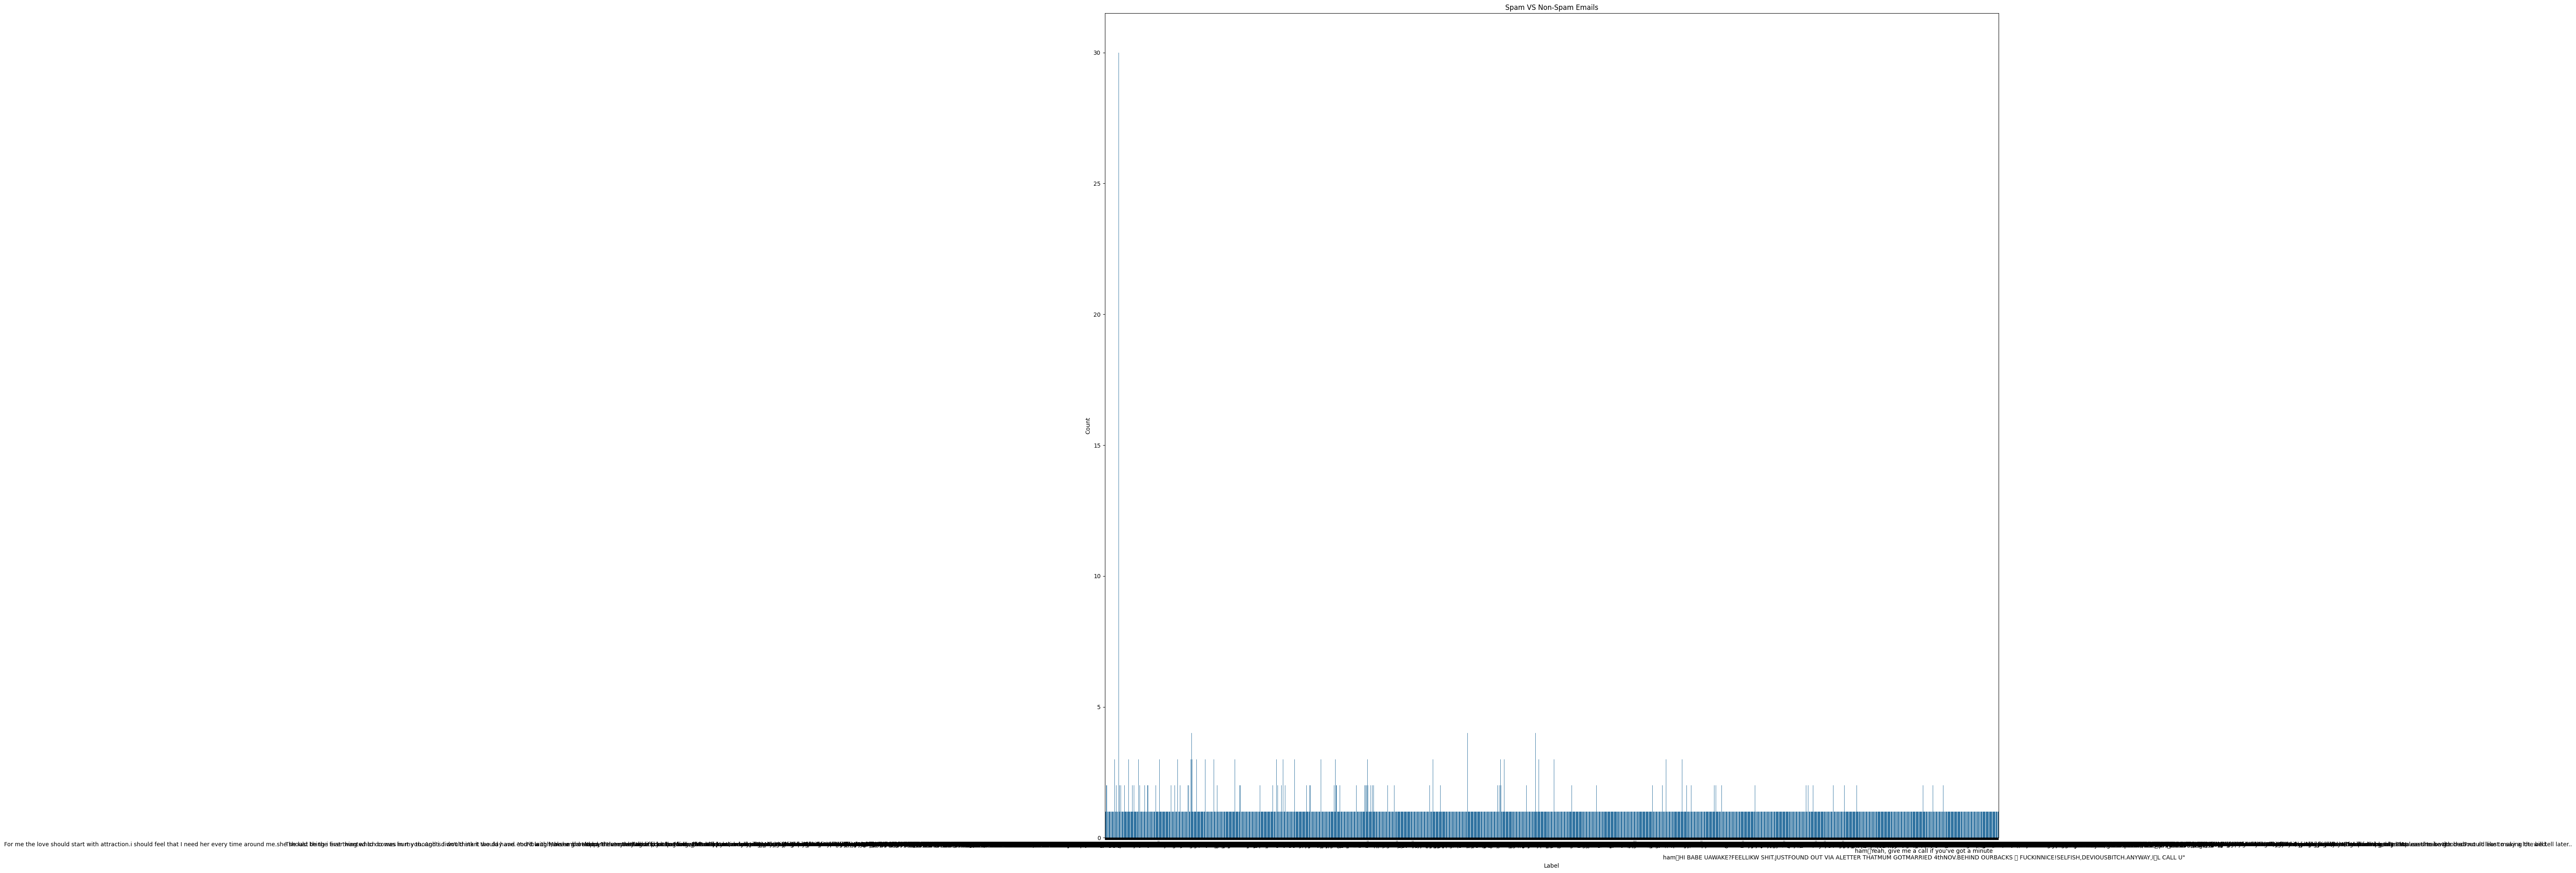

In [19]:
plt.figure(figsize=(48, 46))
sns.countplot(x='Message', data=data)
plt.title('Spam VS Non-Spam Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

Model Training

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data.Message, data.Spam, test_size = 0.25)

In [16]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [17]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [18]:
clf.score(X_test, y_test)

0.9899497487437185

The accuracy is 98%.